<a href="https://colab.research.google.com/github/ovapichi/laboratorio-automatico/blob/main/ejecutar_historico_velocidad_pdf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from google.colab import drive, files
import shutil
drive.mount('/content/drive')
from matplotlib.colors import to_rgba

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!git clone "https://github.com/ovapichi/laboratorio-automatico.git"


Cloning into 'laboratorio-automatico'...
remote: Enumerating objects: 133, done.
remote: Counting objects: 100% (133/133), done.
remote: Compressing objects: 100% (132/132), done.
remote: Total 133 (delta 73), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (133/133), 183.72 KiB | 1.35 MiB/s, done.
Resolving deltas: 100% (73/73), done.


In [ ]:
%run "/content/laboratorio-automatico/Gráfico_Polar.ipynb"
%run '/content/laboratorio-automatico/Fpdf.ipynb'
%run '/content/laboratorio-automatico/Análisis_de_Celda_de_Carga.ipynb'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
  Preparing metadata (setup.py) ... done
  Created wheel for fpdf: filename=fpdf-1.7.2-py2.py3-none-any.whl size=40703 sha256=497f6f9348ba0178d7eff1225f11d16b1776709410e69187490f859d01fe433c
  Stored in directory: /root/.cache/pip/wheels/f9/95/ba/f418094659025eb9611f17cbcaf2334236bf39a0c3453ea455
Successfully built fpdf
fatal: destination path 'laboratorio-automatico' already exists and is not an empty directory.
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
#lee el excel de datos históricos
df=pd.read_excel('/content/drive/Shareddrives/Sociedad Hebraica Argentina/BD SHA.xlsx')
df.columns

Index(['DNI', 'Jugadora', 'Año', 'Mes', 'Fecha', 'Evaluación', 'Extensores D',
       'Extensores I', 'Flexores D', 'Flexores I', 'Simetría Extensores',
       'Simetría Flexores', 'H:Q ratio D', 'H:Q ratio I', 'Posterior',
       'Frontal', 'Derecha', 'Izquierda', 'Ratio anteroposterior', 'Simetría',
       'Ratio derecho', 'Ratio izquierdo', 'Peso', 'Reacción', 'Tiempo 5m',
       'Tiempo 10m', 'Tiempo 20m', 'Tiempo 30m', 'Total 30m', 'Velocidad 5m',
       'Velocidad 10m', 'Velocidad 20m', 'Velocidad 30m', 'Velocidad Total',
       'Aceleración 5m', 'Aceleración 10m', 'Aceleración 20m',
       'Aceleración 30m', 'Aceleración Total', 'Fuerza 5m', 'Fuerza 10m',
       'Fuerza 20m', 'Fuerza 30m', 'Fuerza Total', 'Potencia 5m',
       'Potencia 10m', 'Potencia 20m', 'Potencia 30m', 'Potencia Total'],
      dtype='object')


Jugadora: Agustina Fridman


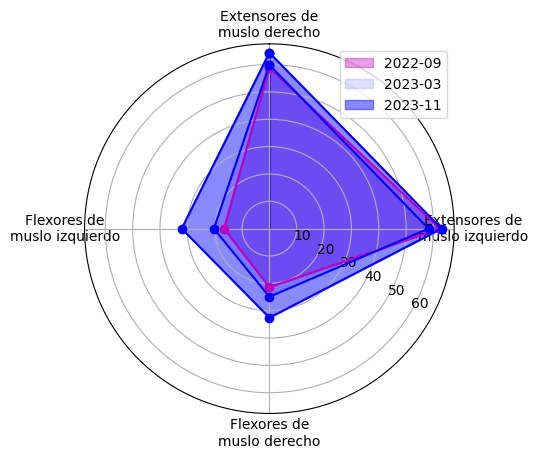

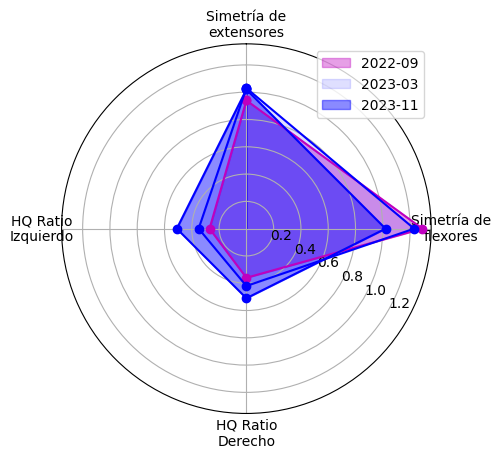


Jugadora: Aixa Martin


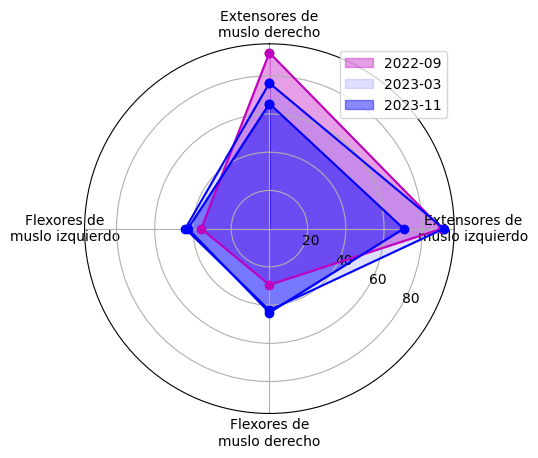

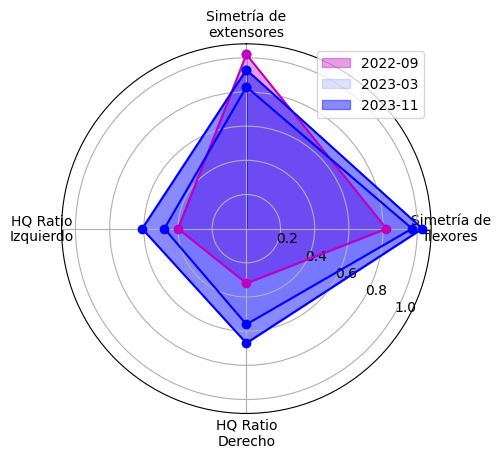


Jugadora: Brenda Naiara Hoffmann


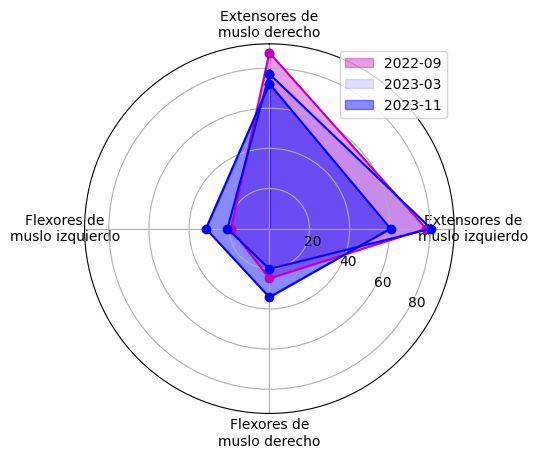

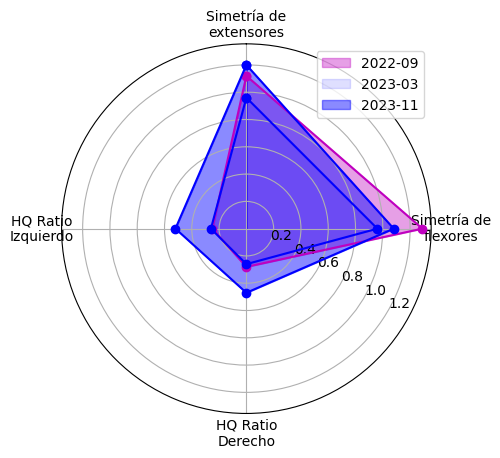


Jugadora: Carolina Altman


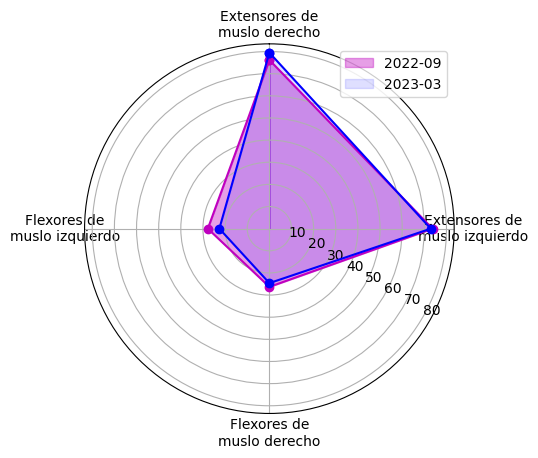

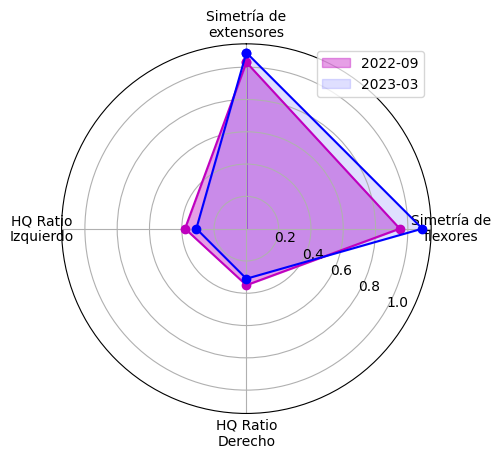


Jugadora: Carolina Waisbord


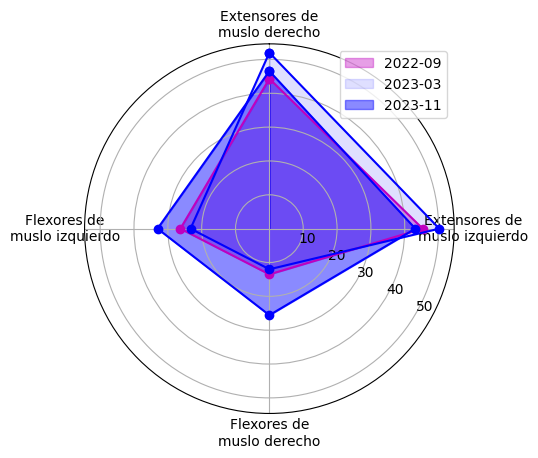

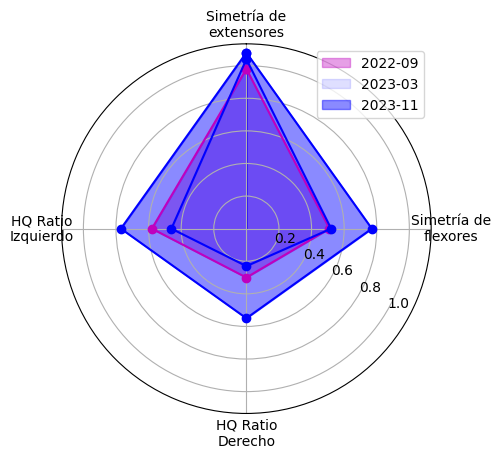


Jugadora: Daniela Finkelstein


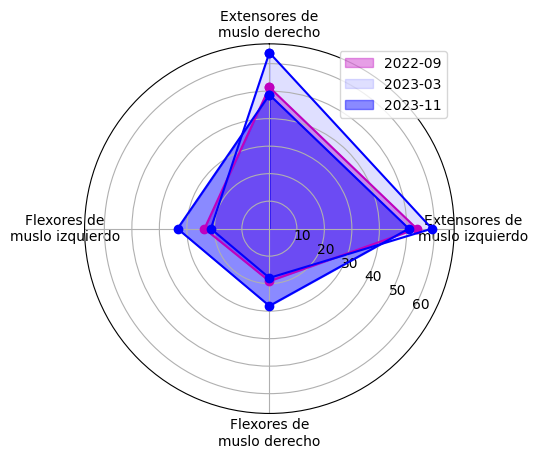

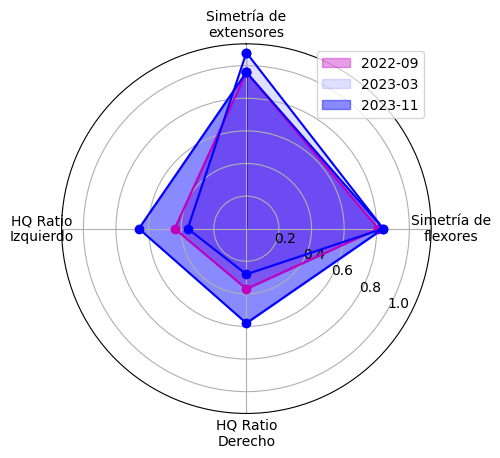


Jugadora: Delfina Vijnovsky


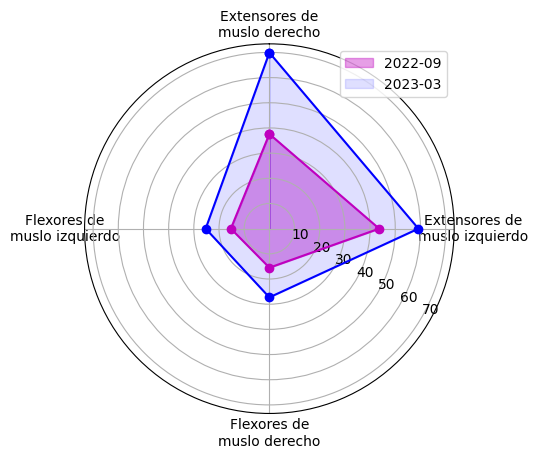

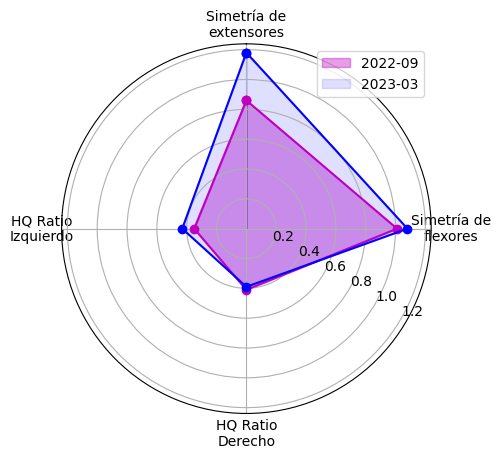


Jugadora: Emilia Borenstein


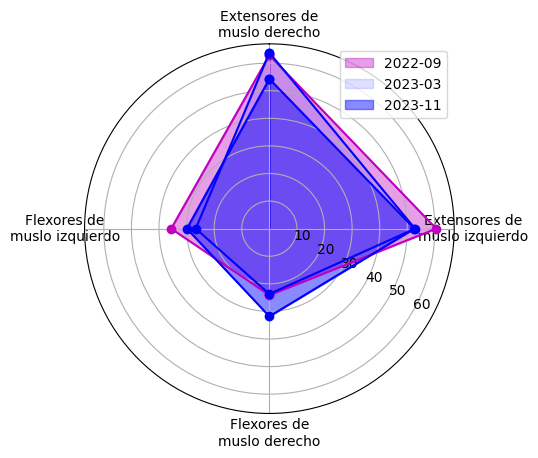

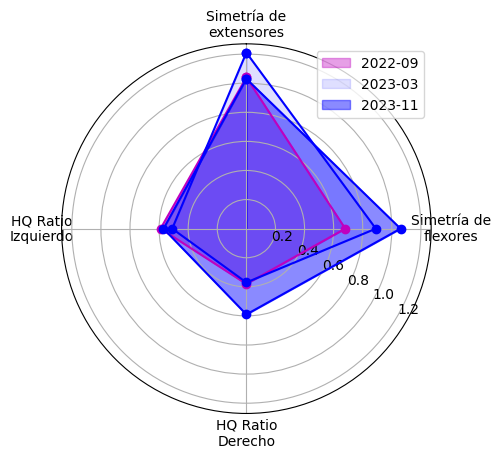


Jugadora: Florencia Altman


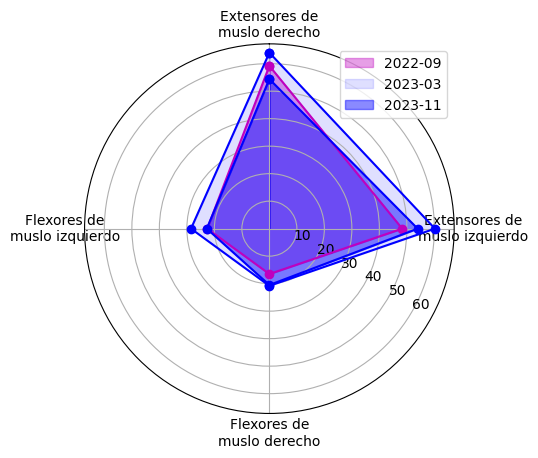

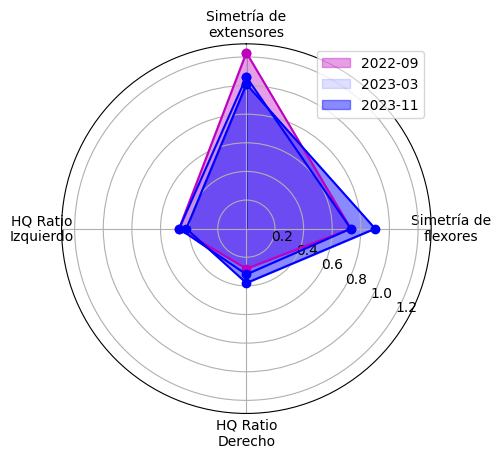


Jugadora: Florencia Apfelbaum


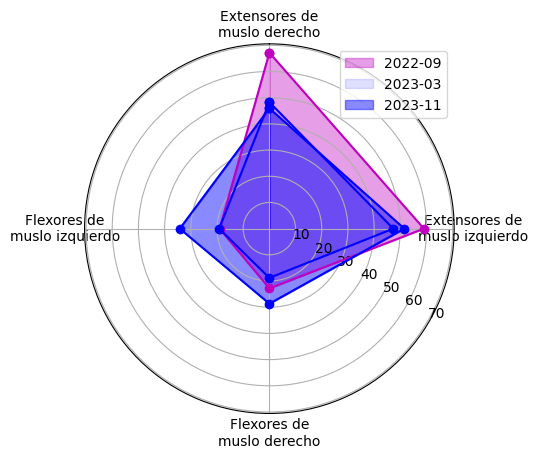

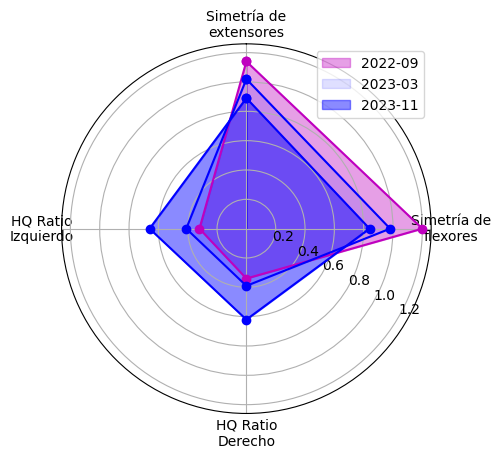


Jugadora: Galia Ciocan


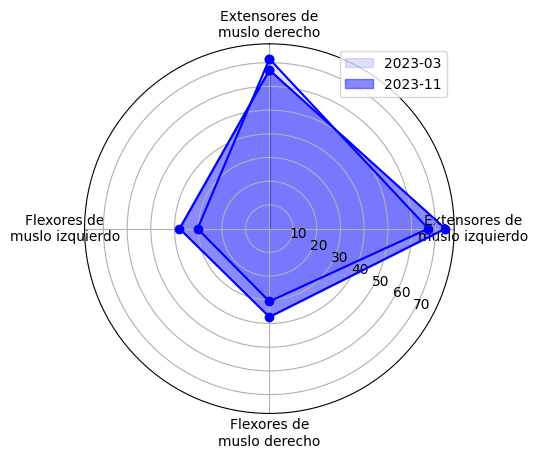

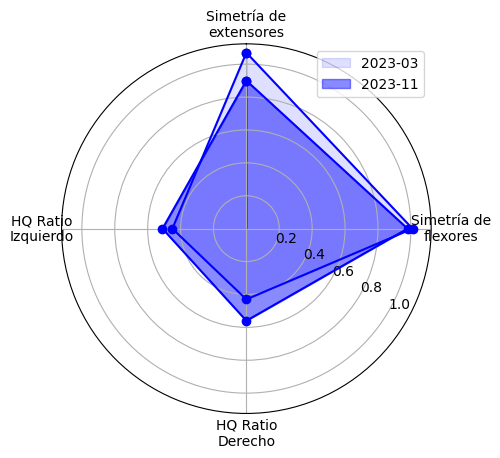


Jugadora: Guadalupe Diaz


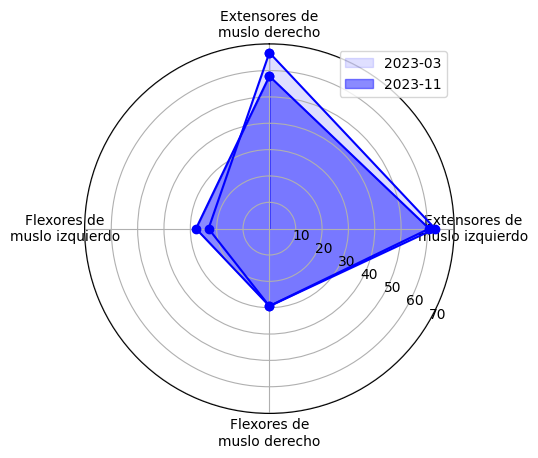

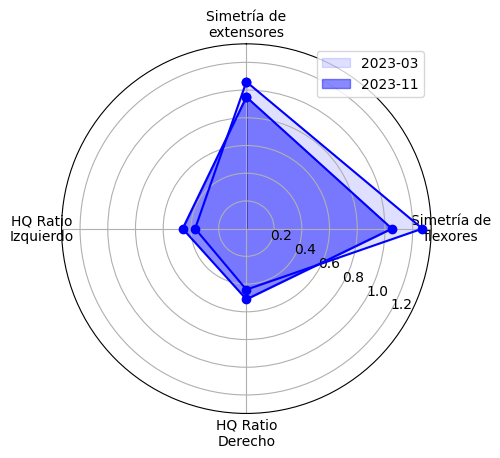


Jugadora: Iara Feinstein


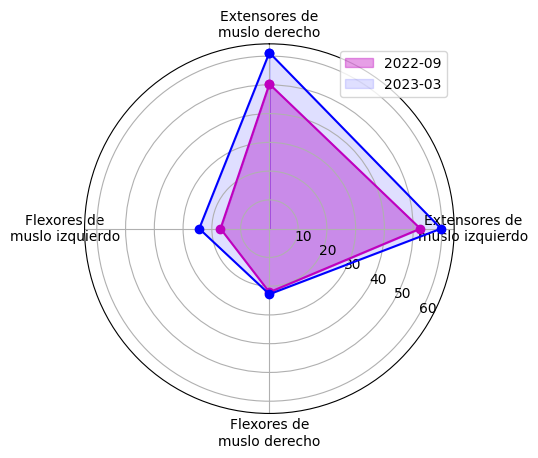

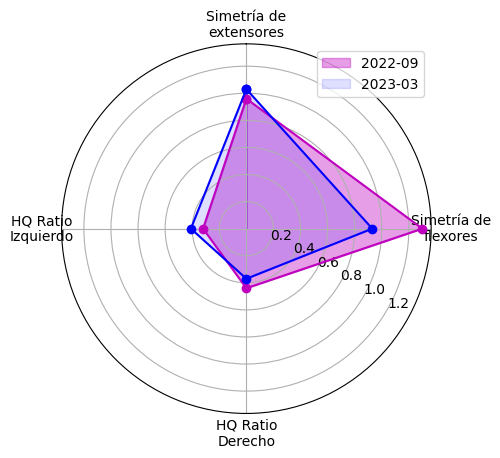


Jugadora: Iara Setton


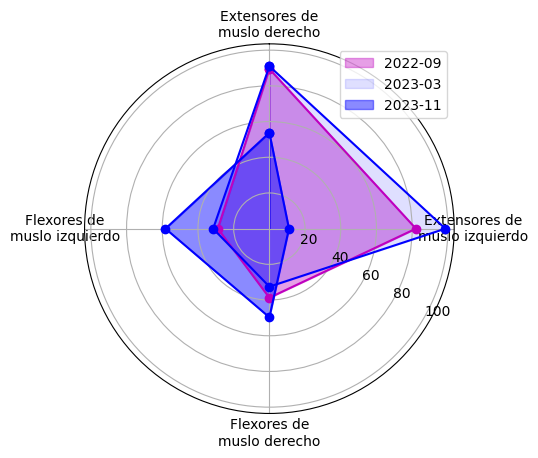

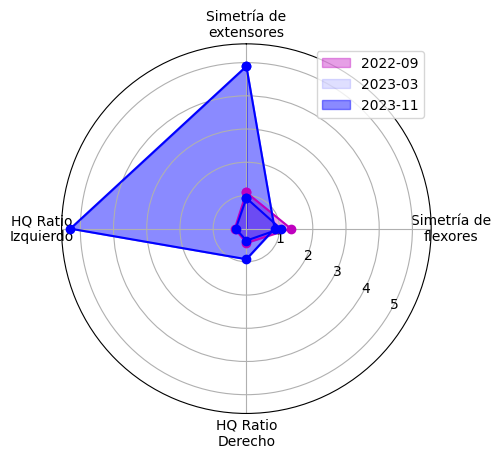


Jugadora: Juanita De Faccio


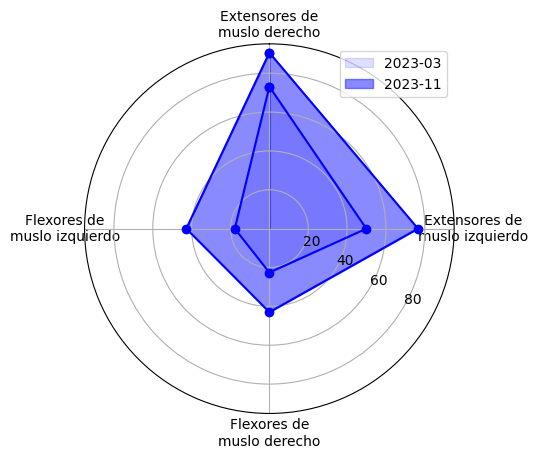

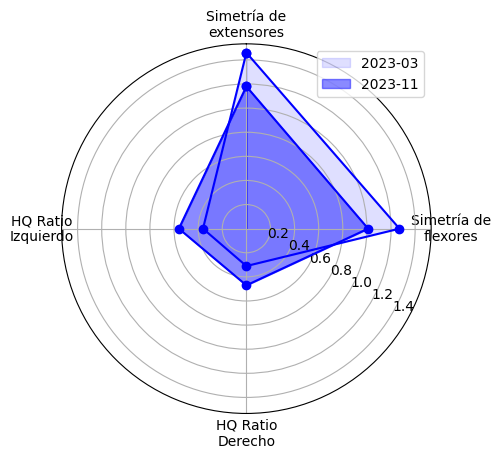


Jugadora: Julieta Bez


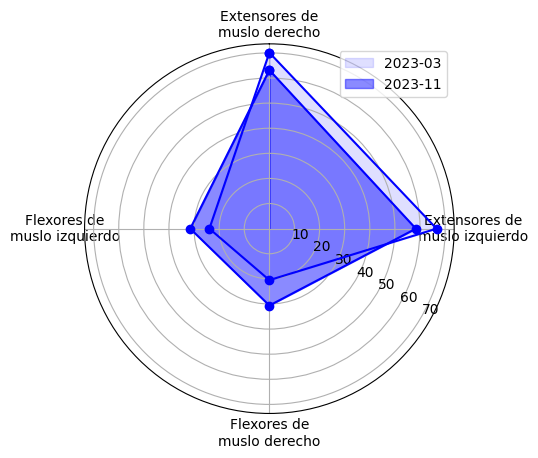

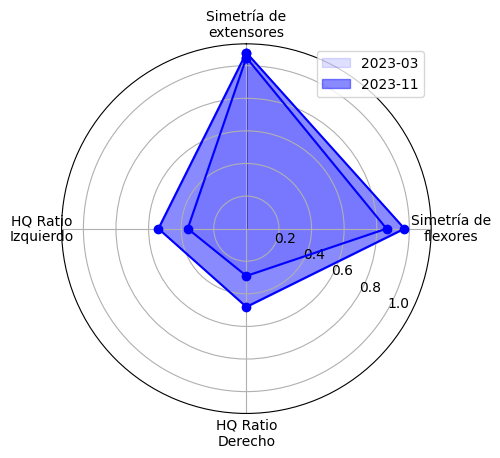


Jugadora: Julieta Binsztok


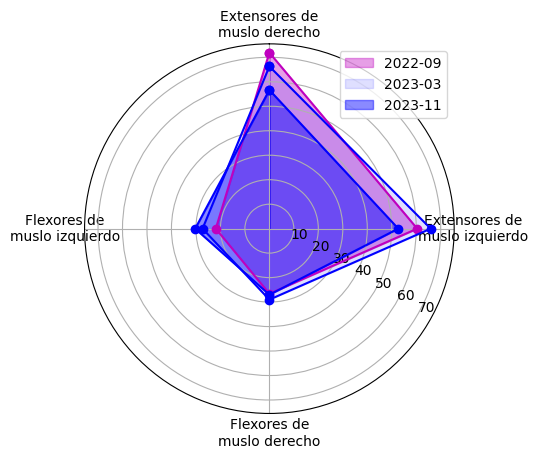

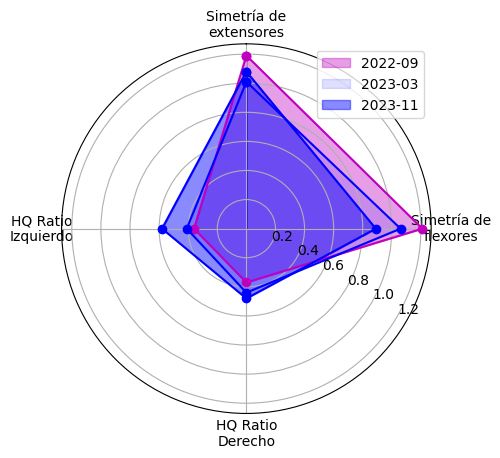


Jugadora: Julieta Fainboim


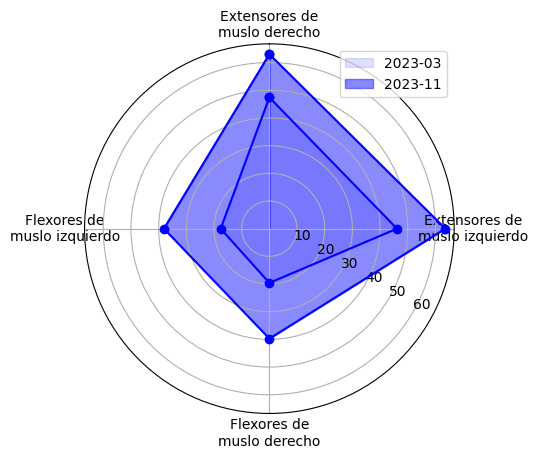

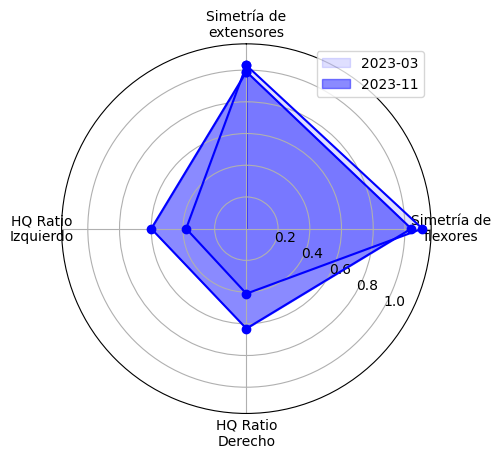


Jugadora: Katherina Cohen


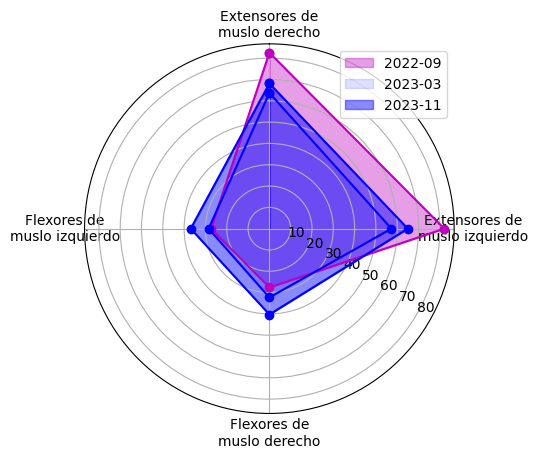

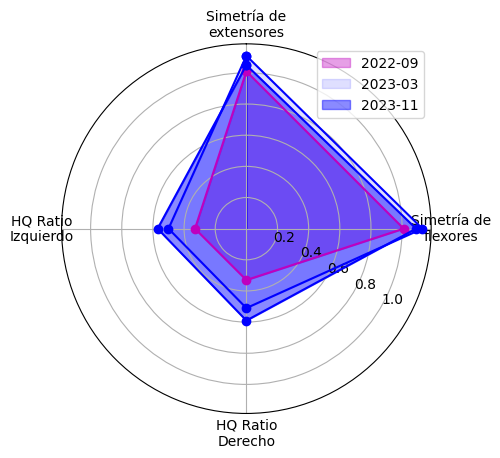


Jugadora: Larissa Barreto


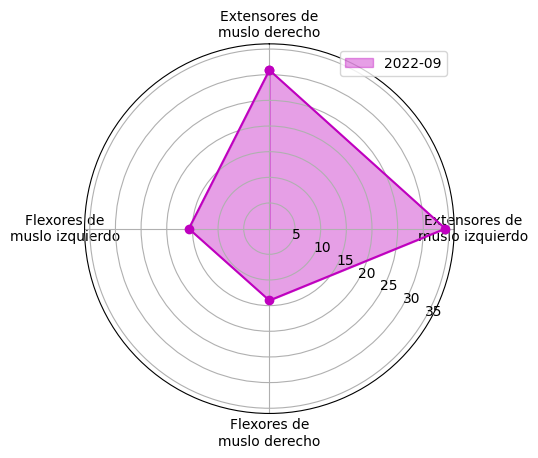

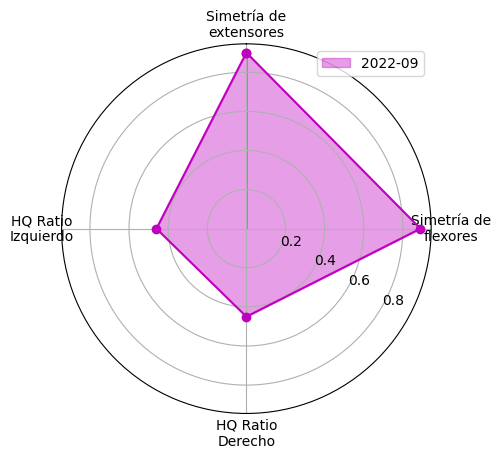


Jugadora: Lucila Liscovsky


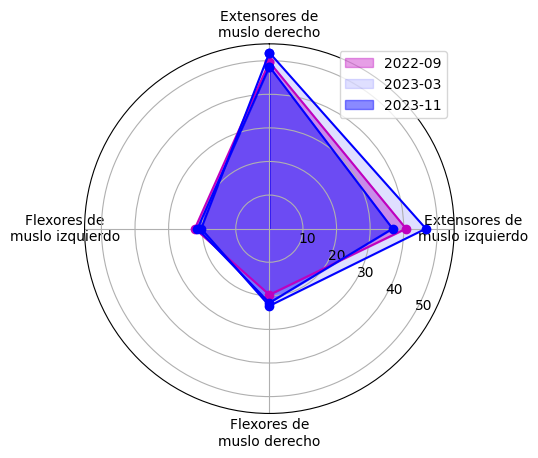

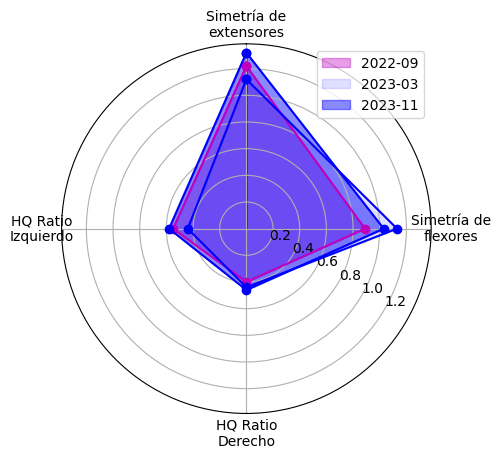


Jugadora: Magdalena Carrasco


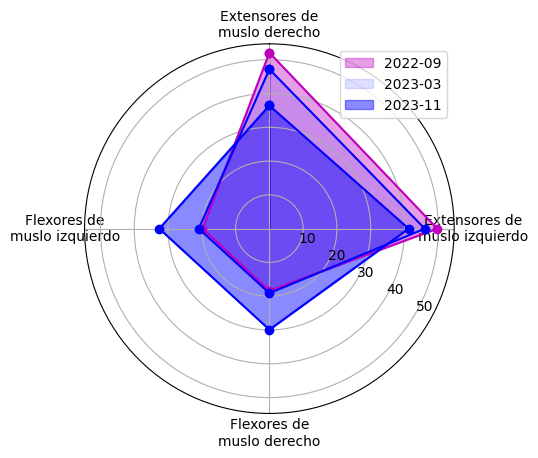

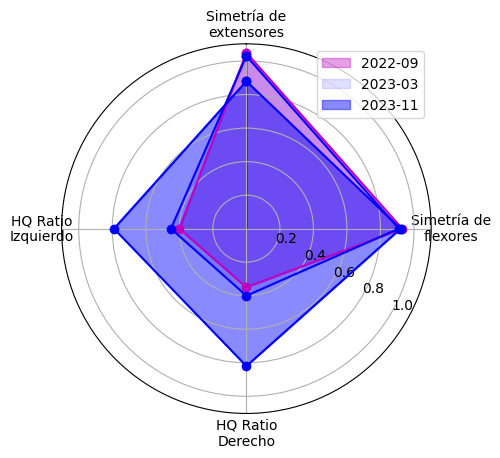


Jugadora: Marina Kleiner


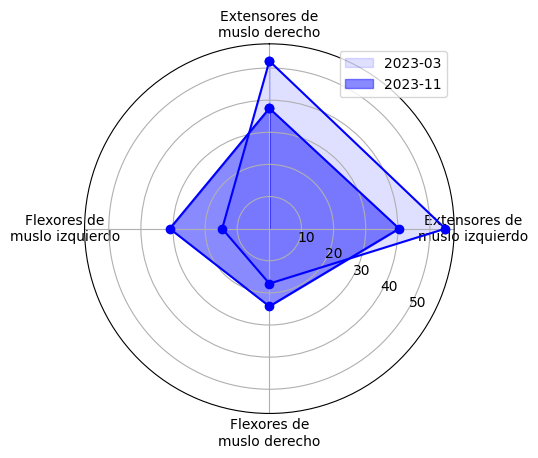

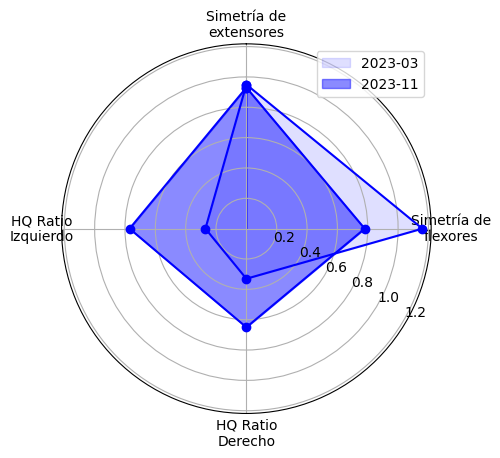


Jugadora: Micaela Cortes


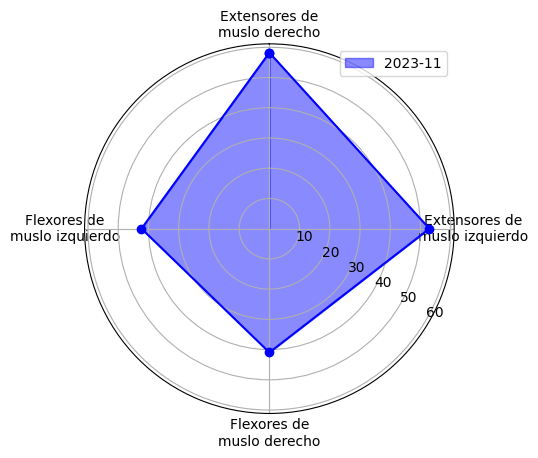

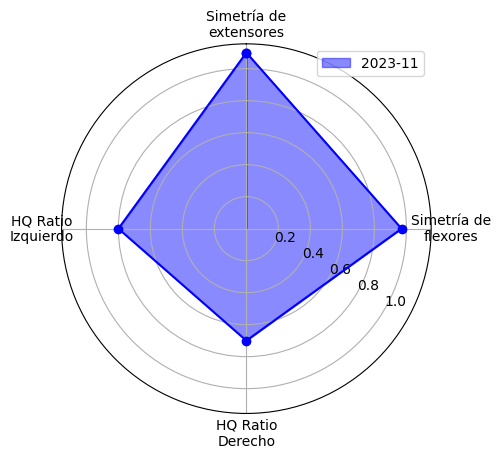


Jugadora: Micaela Duek


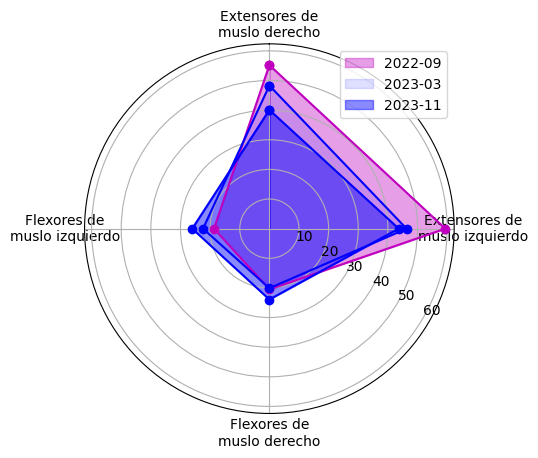

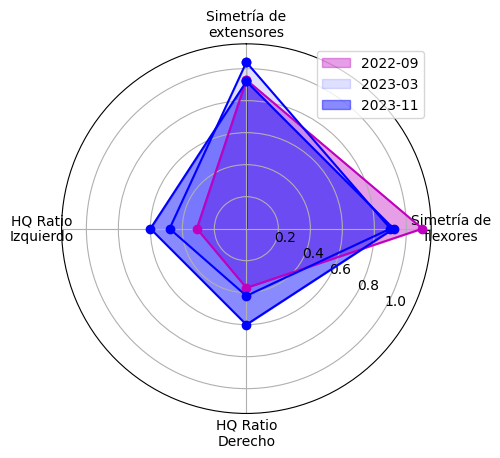


Jugadora: Micaela Werbin


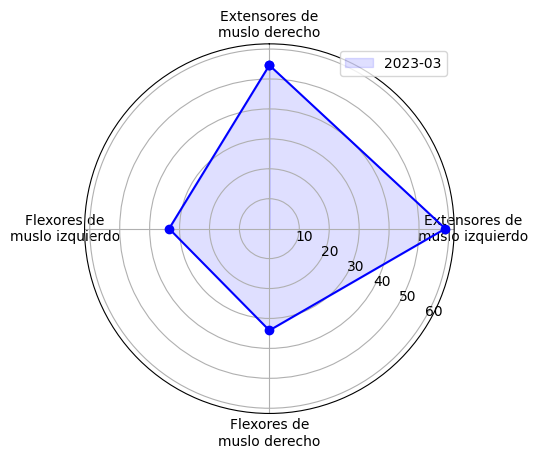

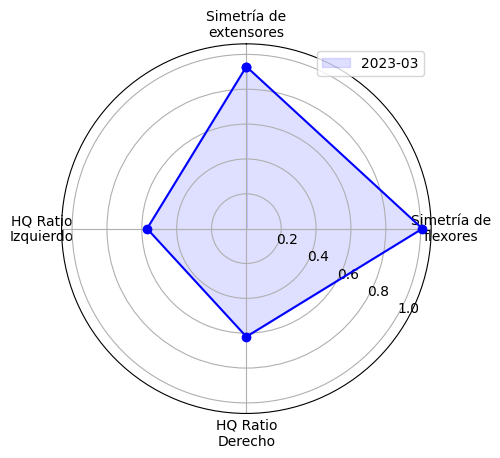


Jugadora: Michelle Segalis


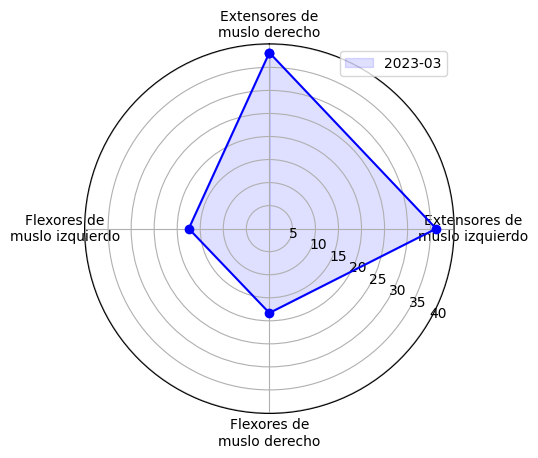

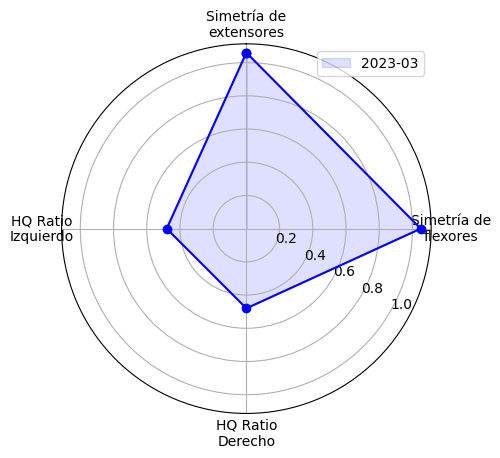


Jugadora: Naiara Moreno


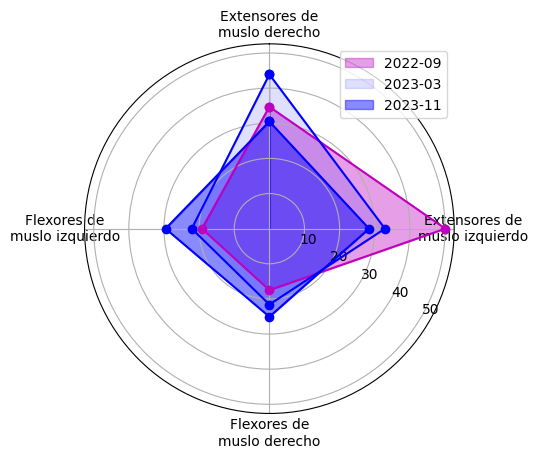

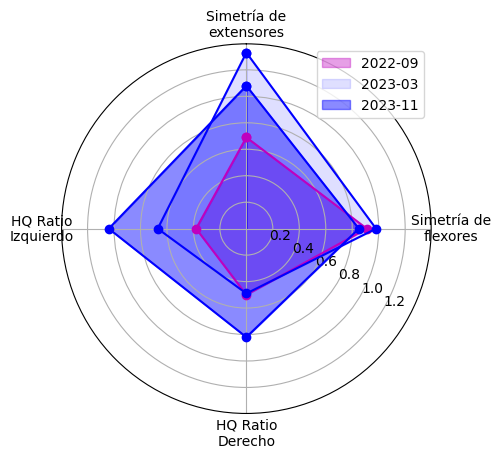


Jugadora: Natalia Del Frari Crespo


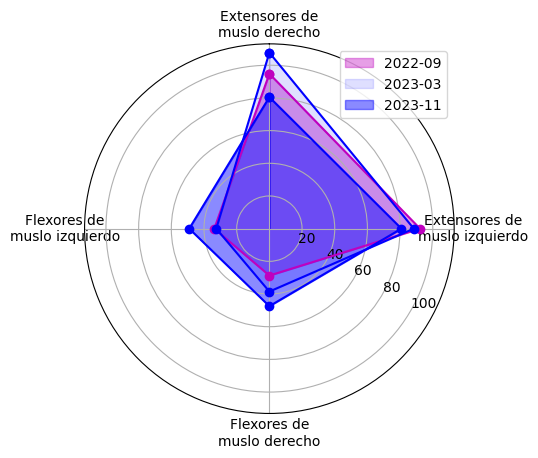

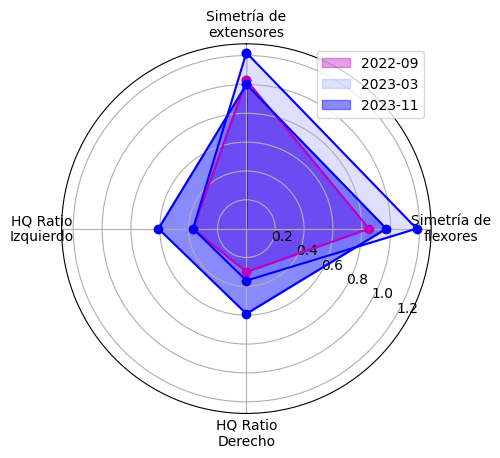


Jugadora: Rocio Veleizan


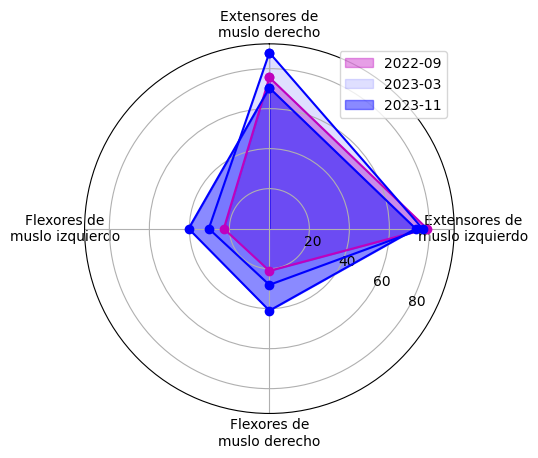

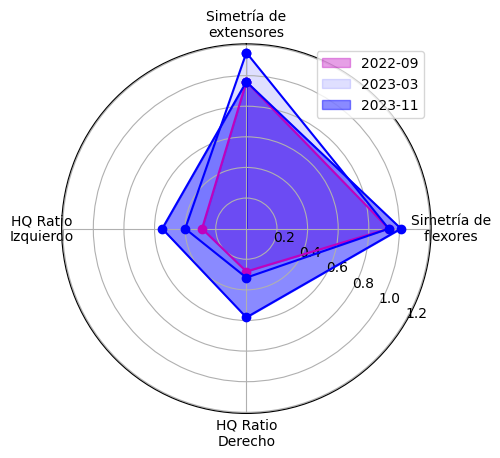


Jugadora: Sabrina Lewin


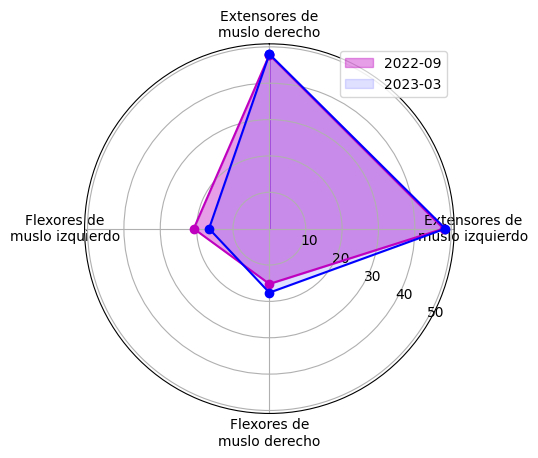

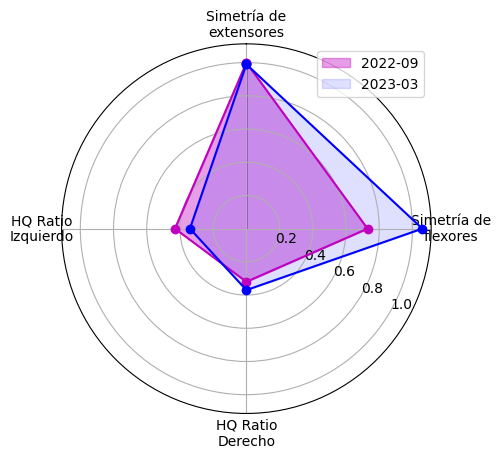


Jugadora: Sofia Bez


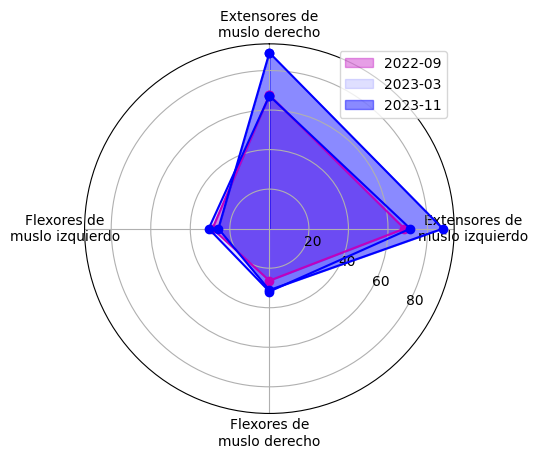

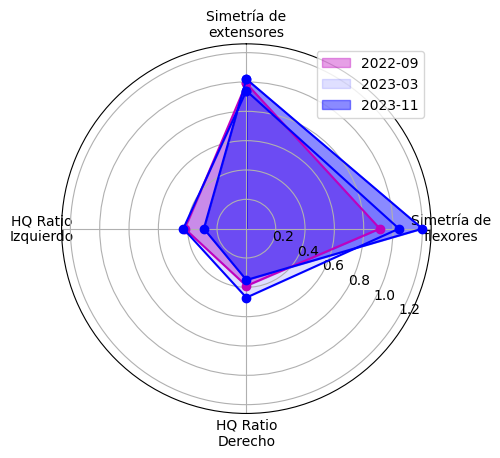


Jugadora: Sofia Hercman


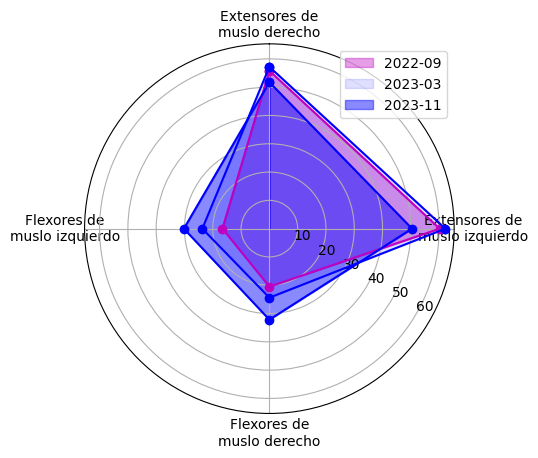

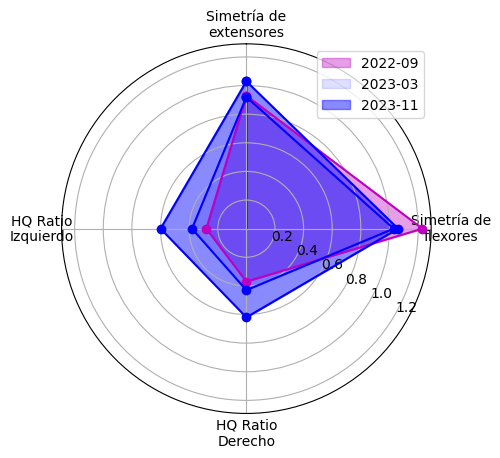


Jugadora: Talia Cabral


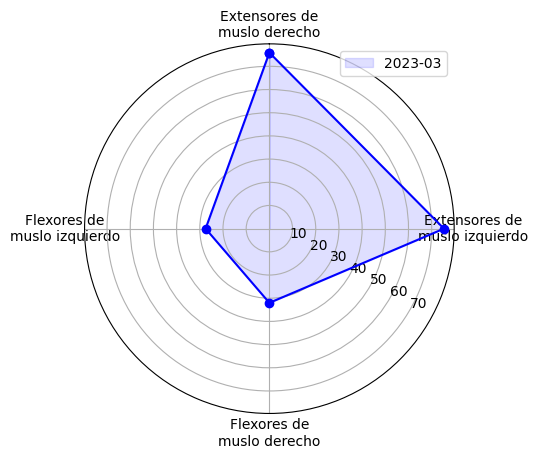

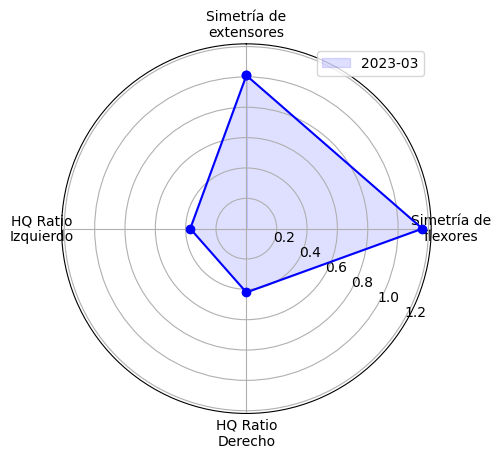

In [ ]:


#toma los datos de velocidad

df_velocidad = df[df['Evaluación'] == 'velocidad'] #VOLAR PESO Y REACCION
columnas_relevantes = ['DNI', 'Jugadora', 'Fecha', 'Peso', 'Reacción', 'Tiempo 5m',
       'Tiempo 10m', 'Tiempo 20m', 'Tiempo 30m', 'Total 30m', 'Velocidad 5m',
       'Velocidad 10m', 'Velocidad 20m', 'Velocidad 30m', 'Velocidad Total',
       'Aceleración 5m', 'Aceleración 10m', 'Aceleración 20m',
       'Aceleración 30m', 'Aceleración Total', 'Fuerza 5m', 'Fuerza 10m',
       'Fuerza 20m', 'Fuerza 30m', 'Fuerza Total', 'Potencia 5m',
       'Potencia 10m', 'Potencia 20m', 'Potencia 30m', 'Potencia Total']

#etiquetas para cada gráfico (se puede obtener desde el nombre de columnas pero lo puse mas bonito)
etiquetas = ["5 m", "10 m", "20 m", "30 m"]
etiquetas_total = ["Tiempo", "Velocidad", "Aceleración", "Fuerza", "Potencia"]

#toma las columnas de velocidad y ordena por jugadora y fecha
df_velocidad = df_velocidad[columnas_relevantes]
df_velocidad = df_velocidad.sort_values(by=['Jugadora', 'Fecha'])

# Agrupar por "Jugadora"
grupos_jugadora = df_velocidad.groupby('Jugadora')

#creo las listas que voy a usar

Peso=[]
Reacción=[]
Tiempo5m=[]
Tiempo10m=[]
Tiempo20m=[]
Tiempo30m=[]
Total30m=[]
Velocidad5m=[]
Velocidad10m=[]
Velocidad20m=[]
Velocidad30m=[]
VelocidadTotal=[]
Aceleración5m=[]
Aceleración10m=[]
Aceleración20m=[]
Aceleración30m=[]
AceleraciónTotal=[]
Fuerza5m=[]
Fuerza10m=[]
Fuerza20m=[]
Fuerza30m=[]
FuerzaTotal=[]
Potencia5m=[]
Potencia10m=[]
Potencia20m=[]
Potencia30m=[]
PotenciaTotal=[]


# Iterar sobre los grupos y realizar operaciones
for nombre_jugadora, grupo in grupos_jugadora:

    #para chequear que vaya iterando a las jugadoras
    print(f"\nJugadora: {nombre_jugadora}")

    Peso=grupo['Peso'].round(2)
    Reaccion=grupo['Extensores I'].round(2)
    Tiempo5m=grupo['Flexores D'].round(2)
    Tiempo10m=grupo['Flexores I'].round(2)
    Tiempo20m=grupo['Simetría Extensores'].round(2)
    Tiempo30m=grupo['Simetría Flexores'].round(2)
    HQ_ratio_D=grupo['H:Q ratio D'].round(2)
    HQ_ratio_I=grupo['H:Q ratio I'].round(2)
    fecha=grupo['Fecha'].tolist()
    lista_tiempo=Peso.tolist(),Reaccion.tolist(),Tiempo5m.tolist(),Tiempo10m.tolist(),Tiempo20m.tolist(),Tiempo30m.tolist(),HQ_ratio_D.tolist(),HQ_ratio_I.tolist()
    lista_velocidad=
    etc...
    #tomo el largo de la lista para saber cuantas evaluaciones se hizo cada jugadora
    largo=len(grupo)
    #creo listas para cada jugadora
    lista_test=[] #todos los valores de cada jugadora
    fecha_test=[] #fechas de cada evaluacion de cada jugadora
    color_list=[] #lista de valores asignados dependiendo la fecha para diferenciar color en el gráfico (Y,MM)
    actual=[]
    lista_nueva=[]
    for i in range(largo):
      #armo la lista de datos para tenerlos en orden
      actual=[Peso.tolist()[i],Reaccion.tolist()[i],Tiempo5m.tolist()[i],Tiempo10m.tolist()[i],Tiempo20m.tolist()[i],Tiempo30m.tolist()[i],HQ_ratio_D.tolist()[i],HQ_ratio_I.tolist()[i]]
  #cargarle todas las listas a la actual
      lista_test.append(actual)

            # Obtener año y mes de la fecha
      fecha = grupo['Fecha'].iloc[i]
      year_month = fecha.strftime('%Y-%m')
      color = float((fecha.year-2020) + fecha.month/12 )

      fecha_test.append(year_month)
      color_list.append(color)
    #print(lista_test)
    #print(variables_abs)
    #print(variables_rel)
    #print(color_list)

    #Envía todos los datos de velocidad de cargas históricos de cada jugadora con el nombre de la jugadora para poner en pdf
    pdf = PDF("p","cm","A4")
    anita=Velocidad(50, 55, 30, 35) #podria iniciarla vacia?

    anita.ejecutar_historico_velocidad(nombre_jugadora,fecha_test,lista_final)

    #llama la función gráfico polar con valores absolutos
    pdf.add_page()
    pdf.set_y(4)
    pdf.set_font('Arial', 'B', 14)

    pdf.cell(0,1,f'Gráficos Polares Históricos',ln=True, align='l')
    tipo="tiempo"
    grafico_polar(nombre_jugadora,tipo,etiquetas,variables_abs,largo,fecha_test,color_list)


    #agregar imágen polar abs
    pdf.image('/content/'+nombre_jugadora+tipo+'polar.png',5,7,10)

     #repetir lineas anteriores por cada lista.

probar cambiando la carpeta a hasta 2023 velocidad...
    # exportar(nombre_jugadora + " velocidad historico",'/content/drive/Shareddrives/Sociedad Hebraica Argentina/Históricos/Hasta 2023/')
